Accuracy: 98.62%


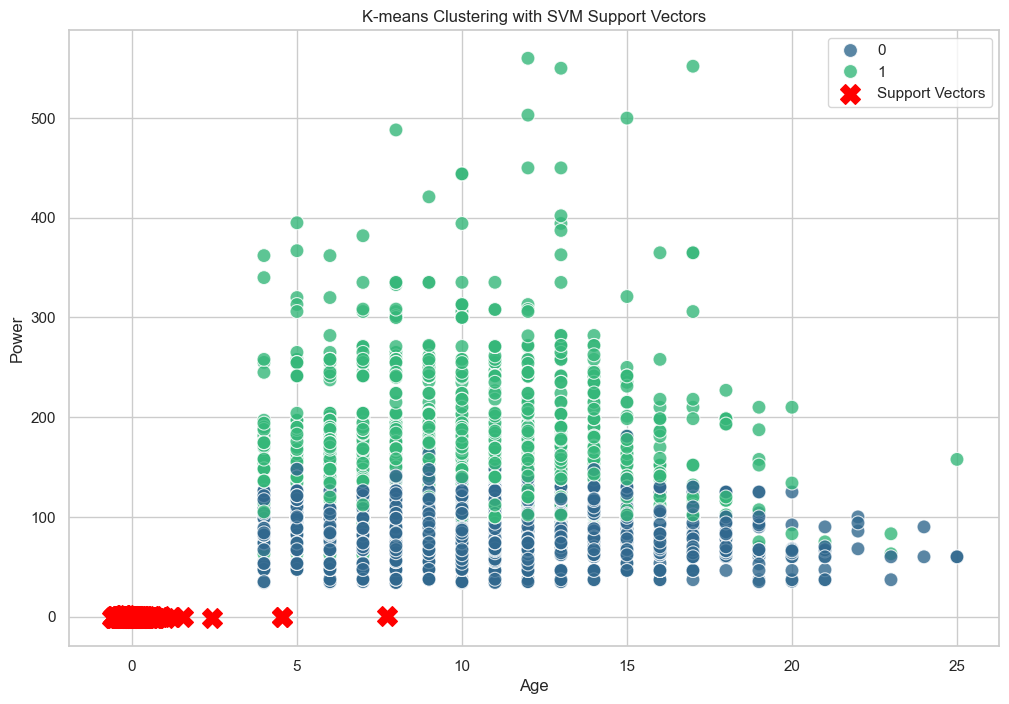

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score
# Load the dataset
data = pd.read_csv('clean-train.csv')
df = pd.DataFrame(data)

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'CP', 'SP']])

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=5000)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Separate data into clusters
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]

# SVM classification
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Cluster'], test_size=0.2, random_state=42)
svm = SVC(probability=True, kernel='poly', degree=3)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize K-means clustering
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Scatter plot of clusters
sns.scatterplot(x='Age', y='Power', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.8)

# Highlight support vectors
support_vectors = X_train[svm.support_]
plt.scatter(support_vectors[:, 0], support_vectors[:, 3], color='red', marker='X', s=200, label='Support Vectors')

plt.title('K-means Clustering with SVM Support Vectors')
plt.xlabel('Age')
plt.ylabel('Power')
plt.legend()
plt.show()


In [9]:
print(classification_report(y_test,predictions))
cnf_matrix = confusion_matrix(y_test, predictions)
precision = precision_score(y_test,predictions, average=None)
recall = recall_score(y_test,predictions, average=None)
print("Confusion Matrix:")
print(cnf_matrix)

print("Precision Scores:")
print(precision)

print("Recall Scores:")
print(recall)


print('Number of Clusters:', kmeans.n_clusters)
print('Initialization Method:', kmeans.init)
print('Max Number of Iterations:', kmeans.max_iter)
print('Convergence Criteria:', kmeans.tol)
clf = SVC(kernel='linear', C=1.0)
print('Kernel:', clf.kernel)
print('Degree:', clf.degree)
print('Regularization Parameter (C):', clf.C)
print('Gamma Parameter:', clf.gamma)
print('Epsilon (SVR):', clf.epsilon)



              precision    recall  f1-score   support

           0       0.98      1.00      0.99       794
           1       0.99      0.96      0.98       368

    accuracy                           0.99      1162
   macro avg       0.99      0.98      0.98      1162
weighted avg       0.99      0.99      0.99      1162

Confusion Matrix:
[[792   2]
 [ 14 354]]
Precision Scores:
[0.98263027 0.99438202]
Recall Scores:
[0.99748111 0.96195652]
Number of Clusters: 2
Initialization Method: k-means++
Max Number of Iterations: 300
Convergence Criteria: 0.0001
Kernel: linear
Degree: 3
Regularization Parameter (C): 1.0
Gamma Parameter: scale
Epsilon (SVR): 0.0


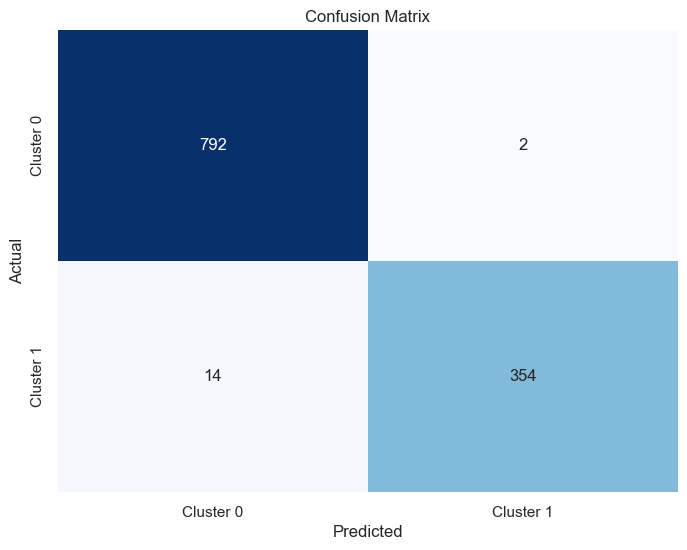

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Cluster 0', 'Cluster 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()